# Samila Demo

In [1]:
import matplotlib.pyplot as plt
import random
import math
from samila import GenerativeImage, Projection

## Basic Generation
If we call `generate` with no input parameters, we get a plot from two random equations

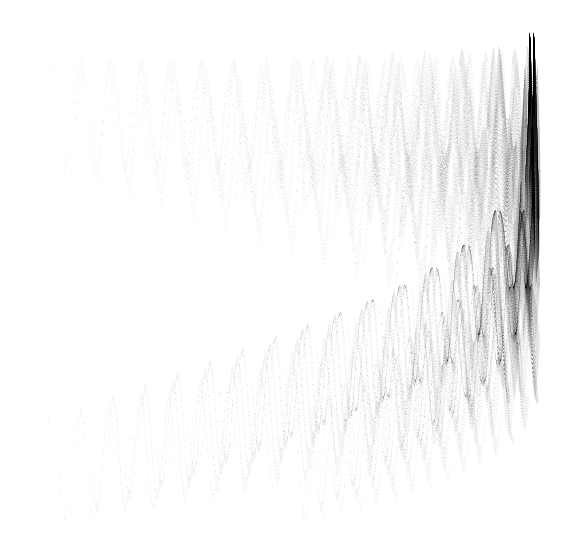

In [66]:
g = GenerativeImage()
g.generate()
g.plot()
plt.show()

## Assigning functions
By defining f1 and f2, we can control the general shape of the plot

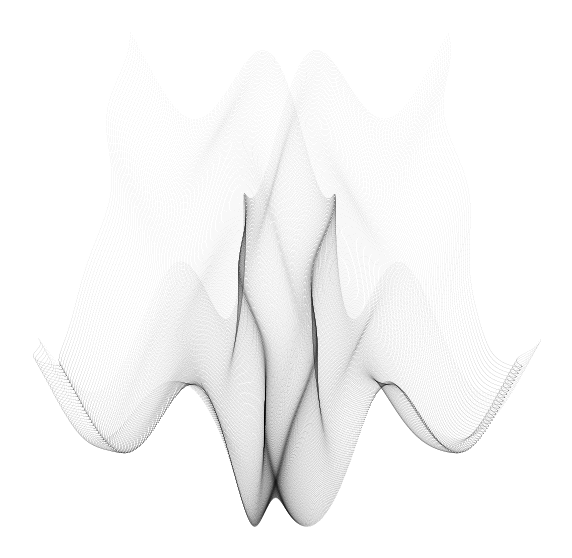

In [3]:
def f1(x, y):
    result = random.uniform(-1,1) * x**2  - math.sin(y**2) + abs(y-x)
    return result

def f2(x, y):
    result = random.uniform(-1,1) * y**3 - math.cos(x**2) + 2*x
    return result

g = GenerativeImage(f1, f2)
g.generate()
g.plot()
plt.show()

## Projection
We can use the `projection` attribute to define the coordinate system to transform our functions. 

The avaliable projections are `RECTILINEAR`, `POLAR`, `AITOFF`, `HAMMER`, `LAMBERT` and `MOLLWEIDE`

Projection.DEFAULT


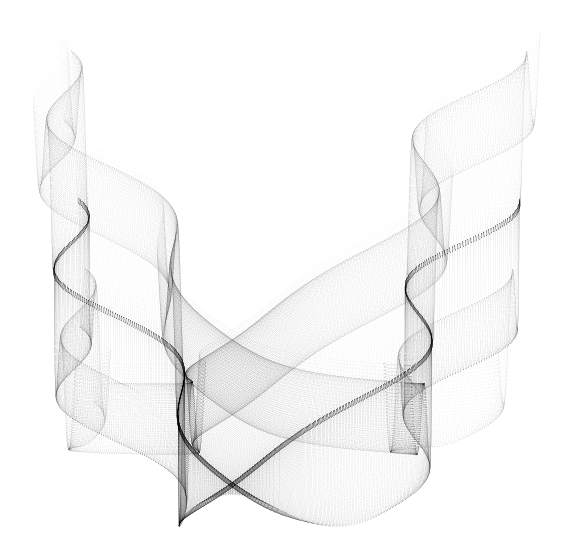

Projection.POLAR


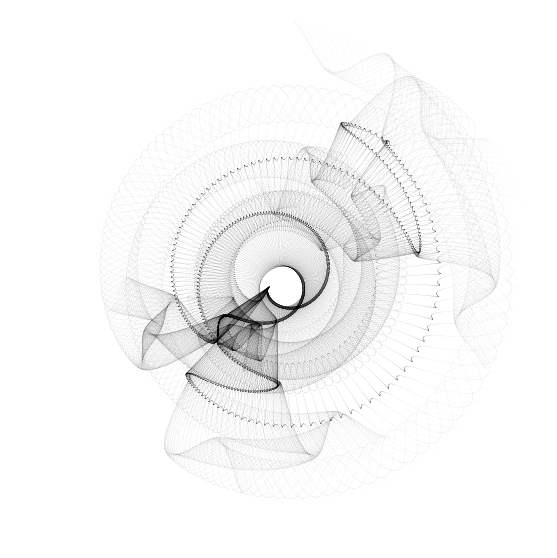

Projection.LAMBERT


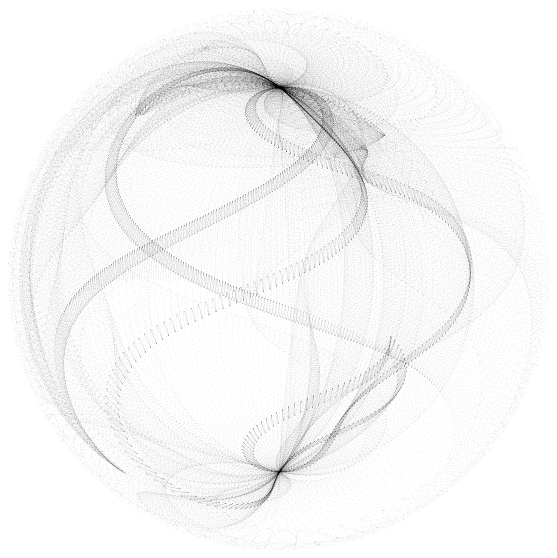

Projection.MOLLWEIDE


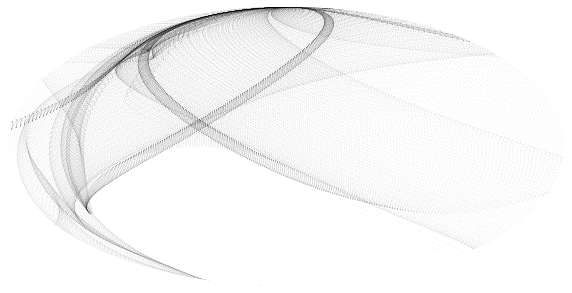

In [13]:
g = GenerativeImage(f1, f2)
g.generate()

for p in [Projection.RECTILINEAR, Projection.POLAR, Projection.LAMBERT, Projection.MOLLWEIDE]:
    print(p)
    g.plot(projection=p)
    plt.show()
    plt.close()
    

## Range

Control the range over which the input values span

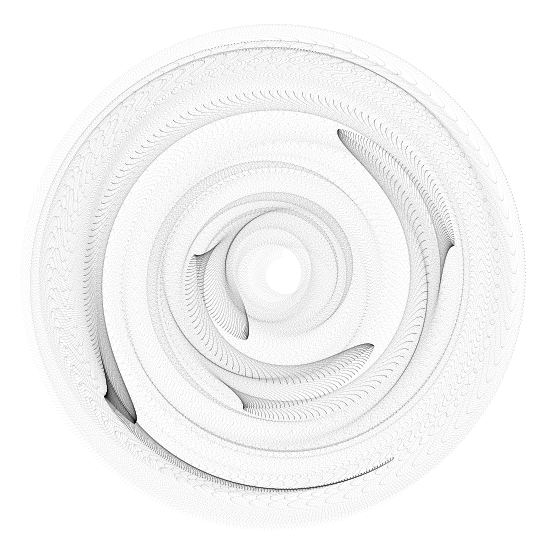

In [56]:
g = GenerativeImage(f1, f2)
g.generate(start=-1.5*math.pi, step=0.007, stop=0)
g.plot(projection=Projection.POLAR)
plt.show()

## Color

We can assign colors for both the background as well as the line

Supported colors are available in `VALID_COLORS` list


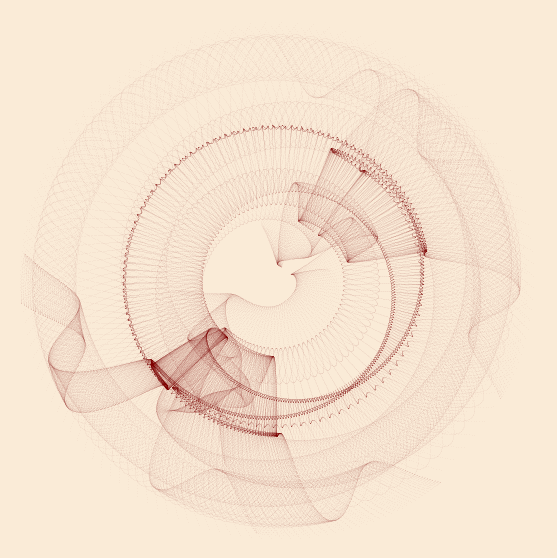

In [46]:
g = GenerativeImage(f1, f2)
g.generate()
g.plot(color="maroon", bgcolor="antiquewhite", projection=Projection.POLAR)
plt.show()

## Spot Size

We can also change the size of the plot marker

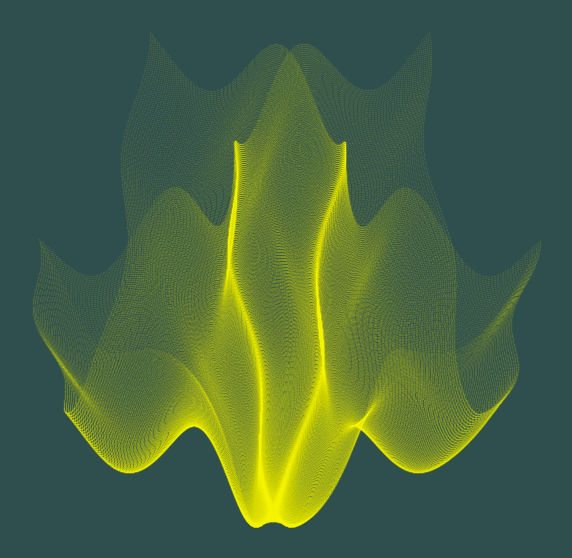

In [59]:
g = GenerativeImage(f1, f2)
g.generate()
g.plot(color="yellow", bgcolor="darkslategray", spot_size=0.25, )
plt.show()

## Random Seeds
If we do not pass in a seed when calling `generate`, a random seed will be created for us. Passing this seed into `generate` will guarantee plot repeatability. 

In [60]:
seed = g.seed
print(seed)

108354


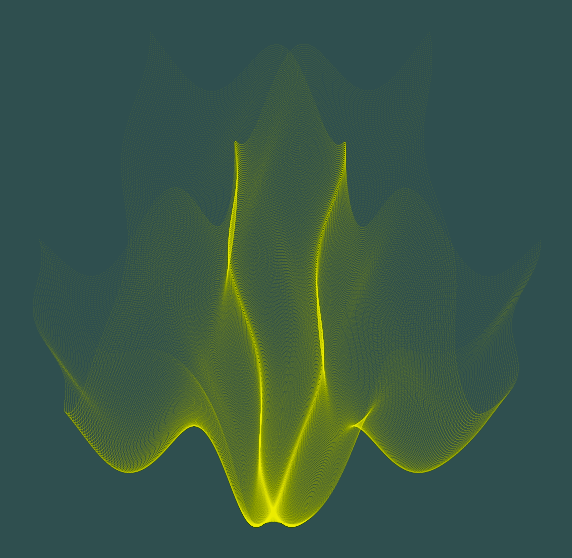

In [64]:
g = GenerativeImage(f1, f2)
g.generate(seed)
g.plot(color="yellow", bgcolor="darkslategray", spot_size=0.05)
plt.show()

## Saving Images

Save generated images. Use the `depth` attribute to increase the resolution.

In [8]:
g.save_image(file_adr="test.png")

{'status': True, 'message': 'Everything seems good.'}

In [9]:
g.save_image(file_adr="test_high_res.png", depth=3)

{'status': True, 'message': 'Everything seems good.'}

## Saving Data

Save data as json. It can then be loaded into a `GenerativeImage` instance.

In [57]:
g.save_data(file_adr="test.json")

{'status': True, 'message': 'Everything seems good.'}

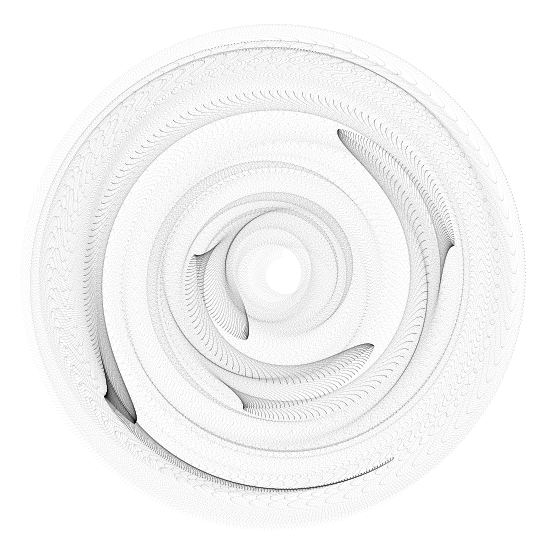

In [58]:
g = GenerativeImage(data=open('test.json', 'r'))
g.plot()